In [21]:
import numpy as np

In [22]:
train_lips = np.load("../data/parole3_bruce_en/train_lips.npy")

In [23]:
print(train_lips.shape)

(71000, 64, 64, 1)


In [24]:
from matplotlib import pyplot as plt

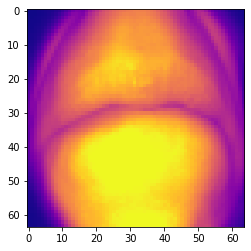

In [25]:
plt.figure()
plt.imshow(train_lips[0,:,:,0],'plasma')

In [26]:
train_tongue = np.load("C:/Users/Pierre/Desktop/XUE_stage/data/parole3_bruce_en/train_tongue.npy")

In [27]:
print(train_tongue.shape)

(71000, 64, 64, 1)


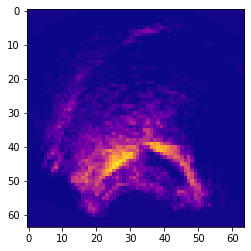

In [28]:
plt.figure()
plt.imshow(train_tongue[0,:,:,0],cmap='plasma')

In [29]:
import librosa

In [30]:
mel_label_train = np.load("../data/parole3_bruce_en/0615specparole3_2ppc735tongue_train_label.npy")

In [31]:
print(mel_label_train.shape)

(70999, 745)


In [37]:
test_sound = librosa.load("../data/20200616_154520_RecFile_1_bruce_ch1/RecFile_1_20200616_154520_Sound_Capture_DShow_5_monoOutput1.wav", sr=None)

In [38]:
print(type(test_sound))

<class 'tuple'>


In [39]:
print(test_sound[0])

[ 0.00045776  0.00012207  0.00042725 ... -0.00039673 -0.00039673
 -0.00039673]


In [40]:
print(test_sound[1])

44100


In [62]:
# spectrum_signal = librosa.feature.melspectrogram(test_sound[0], sr=44100, n_fft=1470, hop_length=512, n_mels=128)
spectrum_signal = np.abs(librosa.stft(test_sound[0]))


In [73]:
print(spectrum_signal.shape)

(1025, 14447)


In [63]:
y_reconstruit = librosa.griffinlim(spectrum_signal)

In [64]:
import librosa.display

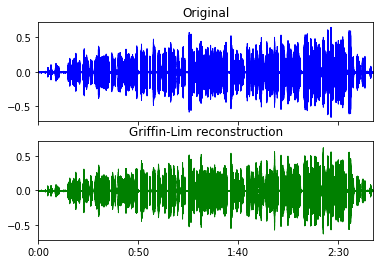

In [65]:
fig, ax = plt.subplots(nrows=2, sharex=True, sharey=True)

librosa.display.waveplot(test_sound[0], sr=44100, color='b', ax=ax[0])

ax[0].set(title='Original', xlabel=None)

ax[0].label_outer()

librosa.display.waveplot(y_reconstruit, sr=44100, color='g', ax=ax[1])

ax[1].set(title='Griffin-Lim reconstruction', xlabel=None)

ax[1].label_outer()

In [66]:
import soundfile as sf

In [67]:
sf.write("test_reconstruit.wav", y_reconstruit,44100)